In [1]:
import powerplantmatching as pm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pm.powerplants(stored=False, update_all=True)
# pm.powerplants().head()

INFO:powerplantmatching.collection:Collect combined dataset for CARMA, GEO, GPD
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'CARMA'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'CARMA'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GEO'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'GEO'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GPD'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'GPD'.
INFO:powerplantmatching.matching:Comparing CARMA with GEO
INFO:powerplantmatching.matching:Comparing CARMA with GPD
INFO:powerplantmatching.matching:Comparing GEO with GPD
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'CARMA'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'CARMA'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GPD'.
IN

Matched Data,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,DateIn,DateRetrofit,DateMothball,DateOut,lat,lon,EIC,projectID
0,Katse muela scheme lesotho,Hydro,Reservoir,PP,LS,71.082803,NaN,0.0,0.0,0.0,0.0,1998.0,1998.0,NaN,NaN,-28.780400,28.45355,[nan],"{'GEO': ['GEO45355'], 'GPD': ['WRI1023088'], '..."
1,Matimba,Hard Coal,Steam Turbine,PP,ZA,3678.746681,NaN,0.0,0.0,0.0,0.0,1988.0,1993.0,NaN,NaN,-23.669370,27.61156,[nan],"{'GEO': ['GEO4203'], 'GPD': ['WRI1000130'], 'C..."
2,Nkula malawi,Hydro,Run-Of-River,PP,MW,84.037080,NaN,0.0,0.0,0.0,0.0,1966.0,1992.0,NaN,NaN,-15.519000,34.82730,[nan],"{'GEO': ['GEO40388'], 'GPD': ['WRI1023104'], '..."
3,Nangbeto togo,Hydro,Reservoir,PP,TG,64.171975,NaN,0.0,0.0,0.0,0.0,1987.0,1987.0,NaN,NaN,7.424000,1.43500,[nan],"{'GEO': ['GEO42585'], 'GPD': ['WRI1023197'], '..."
4,Nalubaale owen falls uganda,Hydro,Reservoir,PP,UG,177.707006,NaN,0.0,0.0,0.0,0.0,1954.0,1991.0,NaN,NaN,0.443525,33.18470,[nan],"{'GEO': ['GEO40375'], 'GPD': ['WRI1023209'], '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,Tit mellil,Natural Gas,OCGT,PP,MA,185.393572,NaN,0.0,0.0,0.0,0.0,1993.0,1994.0,NaN,NaN,33.541000,-7.50200,[nan],{'GEO': ['GEO41601']}
1495,Tororo,Oil,Steam Turbine,PP,UG,0.000000,NaN,NaN,0.0,0.0,0.0,2010.0,2010.0,NaN,NaN,0.665000,34.20000,[nan],{'GEO': ['GEO40378']}
1496,Tundavala angola,Hydro,NaN,PP,AO,0.000000,NaN,NaN,0.0,0.0,0.0,1975.0,1975.0,NaN,NaN,-14.843000,13.43460,[nan],{'GEO': ['GEO5804']}
1497,West damietta,Natural Gas,CCGT,PP,EG,682.773487,NaN,0.0,0.0,0.0,0.0,2012.0,2015.0,NaN,NaN,31.442300,31.60640,[nan],{'GEO': ['GEO44897']}


In [3]:
pm.powerplants().Country.unique()

array(['LS', 'ZA', 'MW', 'TG', 'UG', 'TZ', 'CG', 'AO', 'KE', 'DZ', 'CM',
       'EG', 'BF', 'GH', 'ZM', 'MU', 'SD', 'CF', 'ER', 'SL', 'MA', 'GN',
       'RW', 'MG', 'SZ', 'TN', 'MR', 'LY', 'NE', 'SN', 'GW', 'DJ', 'BJ',
       'GQ', 'NG', 'ET', 'BW', nan, 'GA', 'CV', 'BI', 'GM', 'TD', 'CI',
       'CD', 'MZ', 'SH', 'SC', 'ML', 'KM', 'ZW', 'SO', 'RE', 'LR', 'ST'],
      dtype=object)

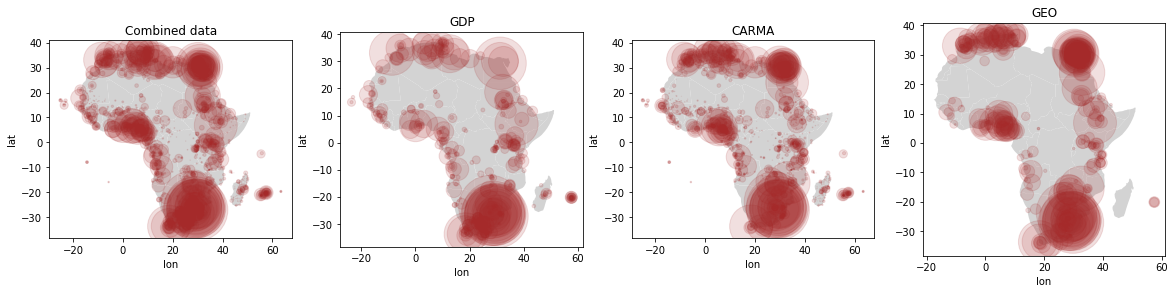

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20,8))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
for ax in axs:
    countries[countries["continent"] == "Africa"].plot(color="lightgrey", ax=ax)
    
pm.powerplants().plot(x="lon", y="lat", kind="scatter", 
                      s="Capacity", c="brown", alpha=0.15,
                      title="Combined data", ax=axs[0])

pm.data.GPD().plot(x="lon", y="lat", kind="scatter", 
                   s="Capacity", c="brown", alpha=0.15,
                   title="GDP", ax=axs[1])

pm.data.CARMA().plot(x="lon", y="lat", kind="scatter", 
                   s="Capacity", c="brown", alpha=0.15,
                   title="CARMA", ax=axs[2])

pm.data.GEO().plot(x="lon", y="lat", kind="scatter", 
                   s="Capacity", c="brown", alpha=0.15,
                   title="GEO", ax=axs[3])

plt.show()